# 1. Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

# 2. Reading Dataset and Understanding the Data

In [7]:
#Reading  the csv file using pandas
bikeSharing = pd.read_csv('day.csv')

In [8]:
bikeSharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
bikeSharing.shape

(730, 16)

In [10]:
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [11]:
bikeSharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [12]:
bikeSharing.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [13]:
#checking the size of data
bikeSharing.size

11680

In [14]:
#checking the columns of data
bikeSharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [17]:
#checking for null values in dataset

count=bikeSharing.isnull().sum()
print(count)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [15]:
#from the above methods we can say

There are 730 rows and 16 columns in the data set. There are no null values in any of the columns.

# 3. Dropping columns which are not useful for our analysis.

In [19]:
# Droping instant column as it is index column which has nothing to do with target so we can drop it.
bikeSharing.drop(['instant'], axis = 1, inplace = True)

In [20]:
bikeSharing.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [21]:
# Dropping dteday column as we have already have month and weekday columns to work with so it is not needed
bikeSharing.drop(['dteday'], axis = 1, inplace = True)
bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [22]:
# Dropping casual and registered column as a we have cnt column which is sum of the both columns that is the target column
bikeSharing.drop(['casual','registered'], axis = 1, inplace = True)
bikeSharing.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,1606
6,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,1510
7,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,959
8,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,822
9,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [23]:
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [25]:
# Understanding the data 

In [26]:
bikeSharing.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [28]:
bikeSharing.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [29]:
bikeSharing.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [30]:
bikeSharing.weekday.value_counts()

1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64

In [31]:
bikeSharing.yr.value_counts()

0    365
1    365
Name: yr, dtype: int64

In [32]:
bikeSharing.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [33]:
#from above we can see that: season,yr,mnth,weekday,workingday,weathersit,holiday all are categorical variables

# 4.EDA

In [34]:
# Getting unique values in all columns
bikeSharing.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

The fields season, yr, mth, holiday, weekday, working and weathersit are categorical. 

The fields like temp, atemp, hum, windspeed and cnt are numeric.

In [35]:
#Getting null values from all columns
bikeSharing.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

No null  or missing values

### Drawing pairplots for numeric variables using seaborn

<Figure size 1440x1800 with 0 Axes>

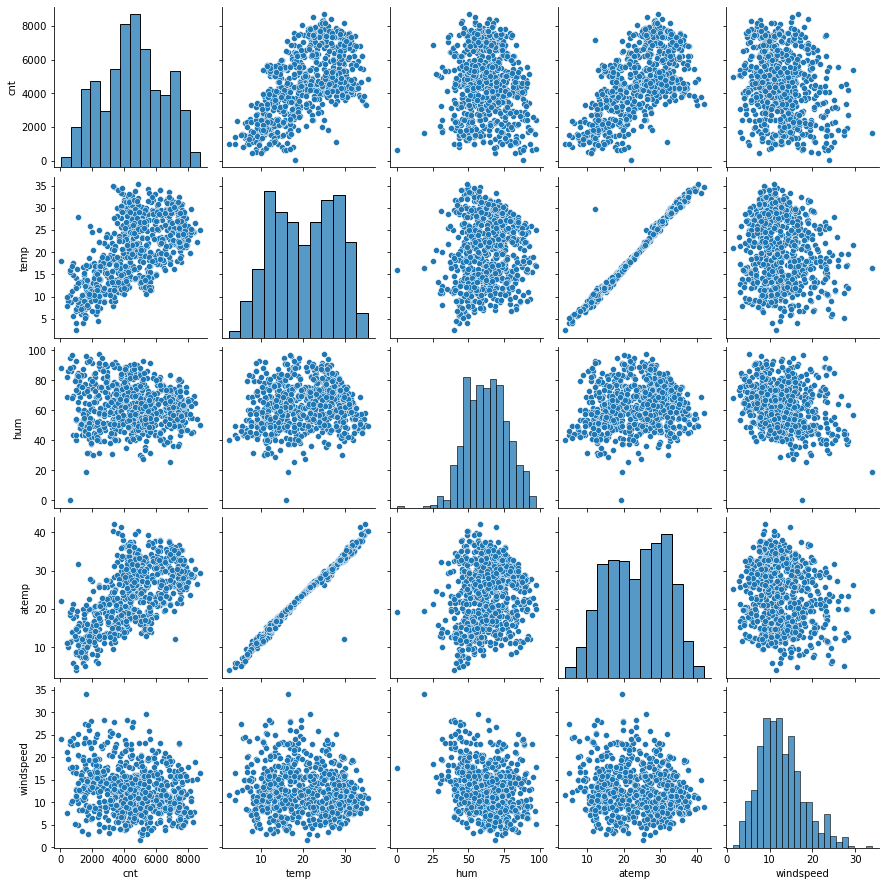

In [36]:
plt.figure(figsize = (20,25))
sns.pairplot(data=bikeSharing_df,vars=['cnt', 'temp', 'hum', 'atemp', 'windspeed'])
plt.show()


Conclusion :

As we can see the temp and atemp are positively correlated with cnt column.

Also, the temp and atemp columns are almost forming a straight line showing high correlation, trying to remove one of the fields while modelling.

 As seen from the correlation map, output variable cnt has a linear relationship with variables like temp, atemp

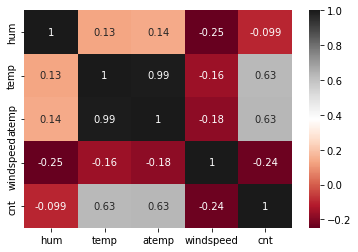

In [39]:
# Let's check relationship of continuous variables with each other 
sns.heatmap(bikeSharing[['hum','temp','atemp','windspeed','cnt']].corr(), cmap='RdGy', annot = True)
plt.show()

As we can see that temp and atemp has correlation .99 means almost 1 (highly correlated) 

so temp field can be dropped here only.

### Dropping temp as it is highly coorelated with atemp

In [40]:
# Removing field dteday as we wont need for analysis
bikeSharing = bikeSharing.drop(['temp'], axis=1)

In [41]:
bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,11.46350,43.6957,12.522300,1600


### Using Boxplot for categorical variables

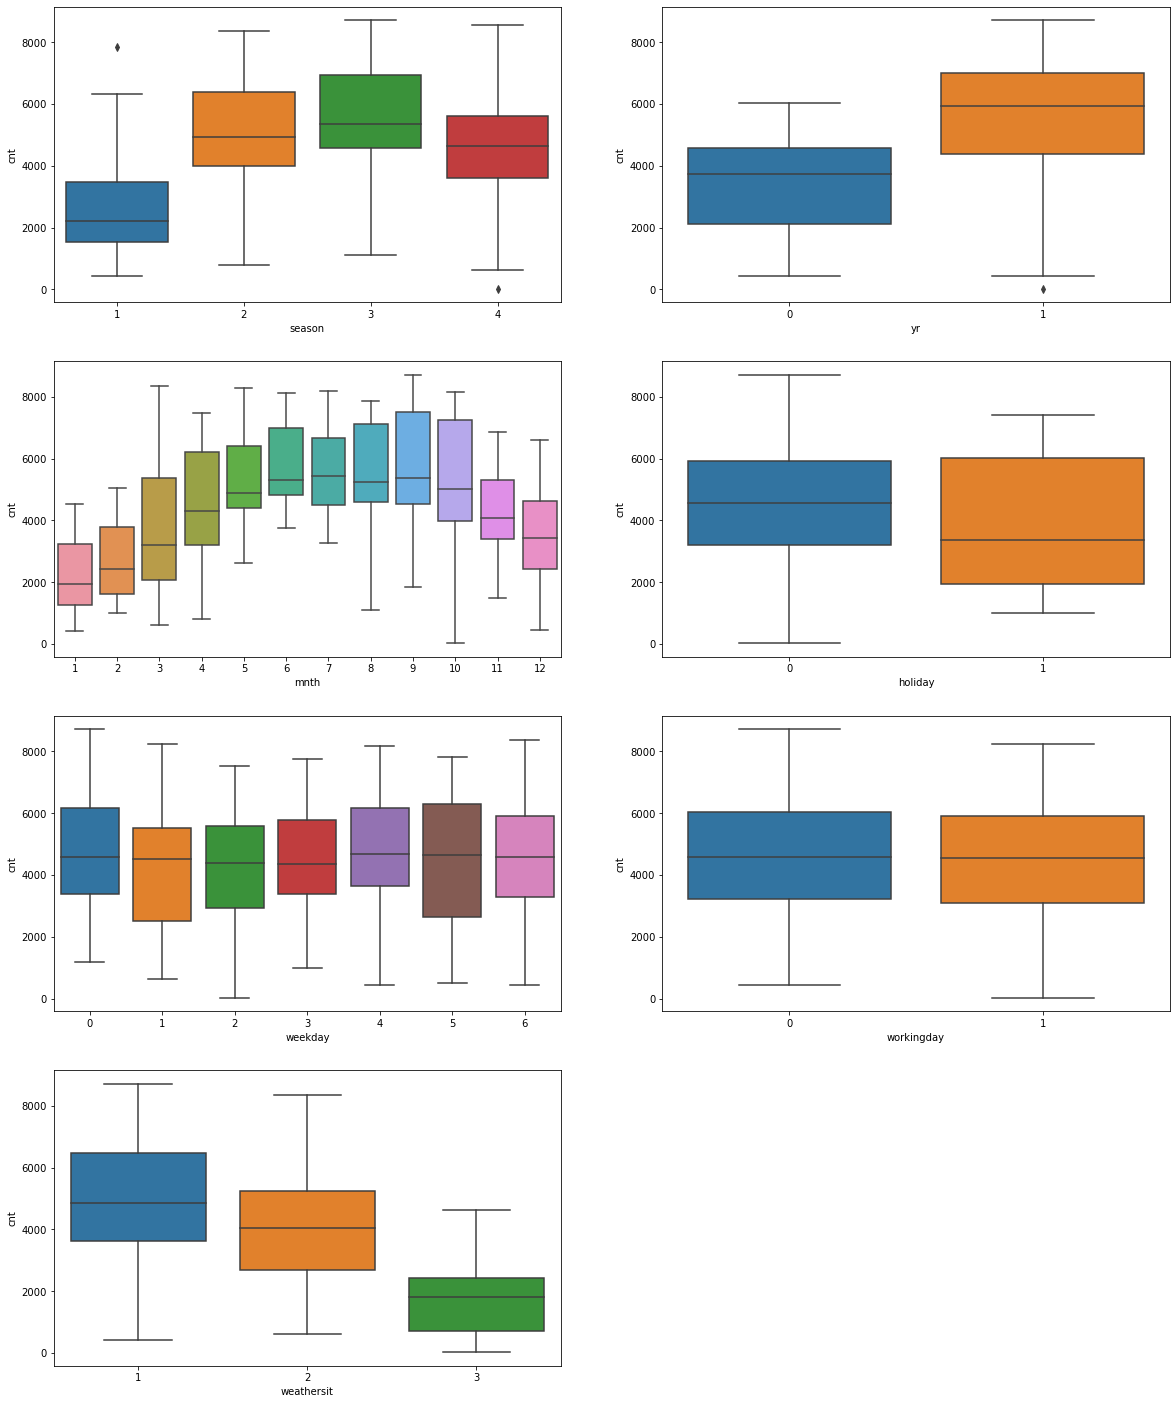

In [46]:
Cat_variables = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(20,25))
for i in enumerate(Cat_variables):
    plt.subplot(4,2,i[0]+1)
    sns.boxplot(data=bikeSharing, x=i[1], y='cnt')
plt.show()

In [49]:
#Converting categorial data to descriptive data for better understanding

bikeSharing.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)


,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,2,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,2,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,1,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,1,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,1,11.46350,43.6957,12.522300,1600


In [50]:
bikeSharing.weekday = bikeSharing.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,1,0,mon,1,2,18.18125,80.5833,10.749882,985
1,spring,0,1,0,tue,1,2,17.68695,69.6087,16.652113,801
2,spring,0,1,0,wed,1,1,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,thu,1,1,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,fri,1,1,11.46350,43.6957,12.522300,1600


In [51]:
bikeSharing.mnth = bikeSharing.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})
bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,2,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,2,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,1,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,1,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,1,11.46350,43.6957,12.522300,1600


In [52]:
bikeSharing.weathersit.replace({1:'good',2:'intermediate',3:'bad',4:'intense'},inplace = True)
bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,intermediate,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,intermediate,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,good,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,good,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,good,11.46350,43.6957,12.522300,1600


### Create dummy variables for all categorical variables

In [53]:
# creating dummy variables and dropping the first one

bikeSharing = pd.get_dummies(data=bikeSharing,columns=["season","mnth","weekday","weathersit"],drop_first=True)

In [56]:
#Getting columns after creating dummies
bikeSharing.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_good', 'weathersit_intermediate'],
      dtype='object')

# 5.  Model Building

### Split the  Data into Training and Testing Sets

In [61]:
# We are specifying this so that the train and test data set always have the same rows.

df_train, df_test = train_test_split(bikeSharing, train_size = 0.7, test_size = 0.3, random_state = 80)

In [62]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_intermediate
659,1,0,1,24.14710,56.8333,5.459381,7058,0,0,1,...,1,0,0,0,0,0,1,0,1,0
129,0,0,1,26.13605,48.9167,7.749957,4803,0,1,0,...,0,0,0,0,0,1,0,0,1,0
672,1,0,1,16.47690,53.2917,12.000236,5107,0,0,1,...,0,0,1,0,0,0,0,0,1,0
255,0,0,1,30.17770,71.2500,9.500868,4763,0,0,0,...,0,1,0,0,0,1,0,0,1,0
523,1,0,0,29.89310,46.7917,11.750661,7736,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [63]:
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_intermediate
254,0,0,1,30.10650,69.2174,5.957171,4713,0,0,0,...,0,1,0,0,0,0,0,1,1,0
5,0,0,0,11.66045,51.8261,6.000868,1606,1,0,0,...,0,0,0,1,0,0,0,0,1,0
345,0,0,1,13.50980,67.0833,4.251150,3310,0,0,1,...,0,0,0,0,0,0,0,1,1,0
144,0,0,1,30.77710,69.6250,10.333611,4978,0,1,0,...,0,0,0,0,0,0,0,0,1,0
423,1,0,1,17.67625,39.5833,12.958939,4363,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [65]:
#SCALING THE NUMERICAL DATA
from sklearn.preprocessing import MinMaxScaler

#Use Normalized scaler to scale
scaler=MinMaxScaler()

In [66]:
#Fit and transform training set only
num_vars=['atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [67]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_intermediate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.500000,0.029412,0.674510,0.510043,0.644238,0.315394,0.518170,0.237255,0.250980,0.243137,...,0.088235,0.080392,0.137255,0.147059,0.152941,0.145098,0.147059,0.127451,0.627451,0.345098
std,0.500491,0.169124,0.469018,0.220800,0.148110,0.164779,0.222644,0.425818,0.434003,0.429398,...,0.283915,0.272166,0.344454,0.354512,0.360284,0.352545,0.354512,0.333805,0.483958,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.321475,0.539417,0.195148,0.366371,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,0.525280,0.640317,0.293406,0.524103,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.691628,0.750214,0.406448,0.683473,0.000000,0.750000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_intermediate
659,1,0,1,0.517619,0.584404,0.078083,0.809480,0,0,1,...,1,0,0,0,0,0,1,0,1,0
129,0,0,1,0.571226,0.502999,0.152073,0.550046,0,1,0,...,0,0,0,0,0,1,0,0,1,0
672,1,0,1,0.310891,0.547987,0.289365,0.585021,0,0,1,...,0,0,1,0,0,0,0,0,1,0
255,0,0,1,0.680157,0.732648,0.208631,0.545444,0,0,0,...,0,1,0,0,0,1,0,0,1,0
523,1,0,0,0.672486,0.481149,0.281304,0.887483,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [75]:
#Lets divide into x and y sets
y_train = df_train.pop('cnt') 
X_train = df_train 

In [76]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_intermediate
659,1,0,1,0.517619,0.584404,0.078083,0,0,1,0,...,1,0,0,0,0,0,1,0,1,0
129,0,0,1,0.571226,0.502999,0.152073,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
672,1,0,1,0.310891,0.547987,0.289365,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
255,0,0,1,0.680157,0.732648,0.208631,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
523,1,0,0,0.672486,0.481149,0.281304,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [77]:
y_train.head()

659    0.809480
129    0.550046
672    0.585021
255    0.545444
523    0.887483
Name: cnt, dtype: float64

### Importing RFE and LinearRegression

In [78]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [79]:
lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr, 15)            
rfe = rfe.fit(X_train, y_train)

In [80]:
#selected Columns by RFE 
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 13),
 ('season_winter', True, 1),
 ('mnth_aug', False, 10),
 ('mnth_dec', True, 1),
 ('mnth_feb', True, 1),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 11),
 ('mnth_mar', False, 14),
 ('mnth_may', False, 5),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 9),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', False, 3),
 ('weekday_sun', False, 4),
 ('weekday_thu', False, 12),
 ('weekday_tue', False, 6),
 ('weekday_wed', False, 7),
 ('weathersit_good', True, 1),
 ('weathersit_intermediate', True, 1)]

In [81]:
X_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'mnth_aug', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_oct', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [82]:

X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul',
       'mnth_nov', 'mnth_sept', 'weathersit_good', 'weathersit_intermediate'],
      dtype='object')

In [87]:
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'hum', 'windspeed', 'season_spring']]

In [89]:
X_train_rfe.shape

(510, 6)

In [88]:
#BUILDING MODEL USING STATSMODEL:

import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [90]:
lr = sm.OLS(y_train,X_train_rfe1).fit()

In [91]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     174.0
Date:                Tue, 16 Aug 2022   Prob (F-statistic):          2.89e-119
Time:                        23:03:52   Log-Likelihood:                 329.42
No. Observations:                 510   AIC:                            -644.8
Df Residuals:                     503   BIC:                            -615.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.7093      0.033     21.220

In [92]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,5.10
4,windspeed,3.72
2,workingday,3.12
0,yr,1.88
5,season_spring,1.33
1,holiday,1.09


In [93]:
X_train_rfe1.head()

,const,yr,holiday,workingday,hum,windspeed,season_spring
659,1.0,1,0,1,0.584404,0.078083,0
129,1.0,0,0,1,0.502999,0.152073,0
672,1.0,1,0,1,0.547987,0.289365,0
255,1.0,0,0,1,0.732648,0.208631,0
523,1.0,1,0,0,0.481149,0.281304,0


In [94]:
#COLUMN hum HAS A VERY HIGH VIF SO WE DROP IT 
X_train_rfe=X_train_rfe.drop(['hum'],axis=1)

In [98]:
#Dropping the variable
X_train_rfe1 = sm.add_constant(X_train_rfe)
lr1 = sm.OLS(y_train,X_train_rfe1).fit()

In [99]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     186.8
Date:                Tue, 16 Aug 2022   Prob (F-statistic):          2.96e-112
Time:                        23:07:21   Log-Likelihood:                 310.28
No. Observations:                 510   AIC:                            -608.6
Df Residuals:                     504   BIC:                            -583.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5260      0.017     31.448

In [100]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,2.79
2,workingday,2.36
0,yr,1.73
4,season_spring,1.32
1,holiday,1.07


In [103]:
X_train_rfe.columns

Index(['yr', 'holiday', 'workingday', 'windspeed', 'season_spring'], dtype='object')

In [104]:
#Windspeed has high VIF >2 so we drop it
X_train_rfe=X_train_rfe.drop(['windspeed'],axis=1)

In [105]:
X_train_rfe2 = sm.add_constant(X_train_rfe)
lr2 = sm.OLS(y_train,X_train_rfe2).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     217.6
Date:                Tue, 16 Aug 2022   Prob (F-statistic):          2.23e-108
Time:                        23:13:18   Log-Likelihood:                 298.42
No. Observations:                 510   AIC:                            -586.8
Df Residuals:                     505   BIC:                            -565.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4731      0.013     36.223

In [107]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,1.62
0,yr,1.57
3,season_spring,1.22
1,holiday,1.04


### We have considered all columns and checked.Now we stop the model building and check on which model can we choose

# 6. Model Evaluation

 ### Residucal Analysis

Text(0.5, 0, 'Errors')

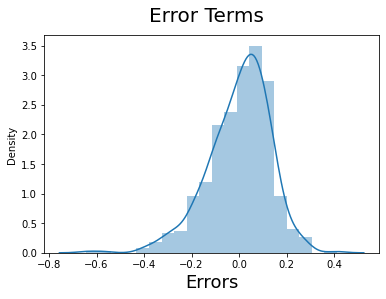

In [117]:
y_train_cnt = lr1.predict(X_train_rfe1)

# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

Observation :
    
Residuals are normally distributed

The first and important assumption for Linear Regression is valid

In [118]:
#Checking columns
X_train_rfe1.columns

Index(['const', 'yr', 'holiday', 'workingday', 'windspeed', 'season_spring'], dtype='object')

In [120]:
print(X_train_rfe1.shape)


(510, 6)


### There is a linear relationship between X and Y

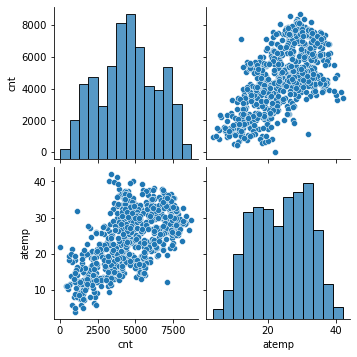

In [121]:
col_names = ['cnt','atemp']

sns.pairplot(bikeSharing, vars = col_names)
plt.show()

### Errors are normally distribured here with mean 0. So everything seems to be fine

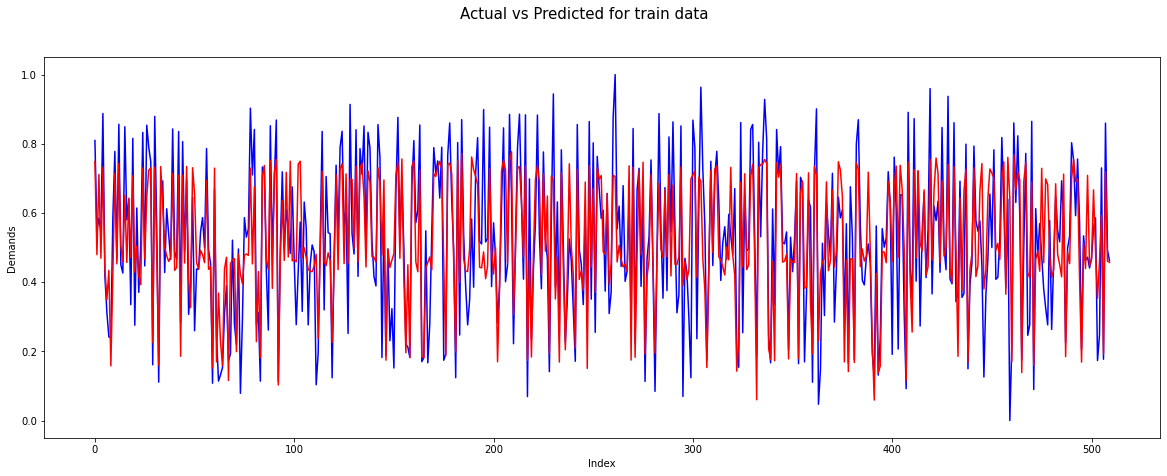

In [123]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.figure(figsize=(20,7))
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_cnt, color="red")
plt.suptitle('Actual vs Predicted for train data', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

In [124]:
#Scaling the test data

num_vars=['atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [125]:
#Creating x and y sets

y_test = df_test.pop('cnt')
X_test = df_test

In [126]:
X_train_new=X_train_rfe1.drop(['const'], axis=1)

In [127]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [129]:
#Making predictions on the chosen model

y_pred = lr1.predict(X_test_new)

Text(0, 0.5, 'y_pred')

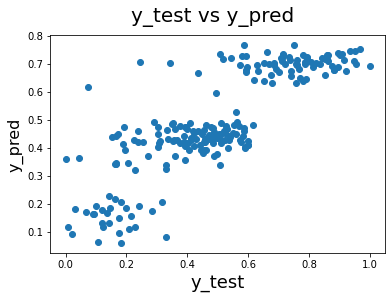

In [130]:
#CHECKING PREDICTED V/s TEST DATA 

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

#### We have a model that seems good enough to predict demand of bikes. The actual and predicted cnt i.e demand significantly overlapped, 
#### thus indicating that the model is able to explain the change in demand very well.

In [131]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [132]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

0.133664147470113

In [133]:
#Calculate the r square for test

r_squared = r2_score(y_test, y_pred)
r_squared

0.6877799206705519

In [134]:
X_t=X_train_new.iloc[:,0].values

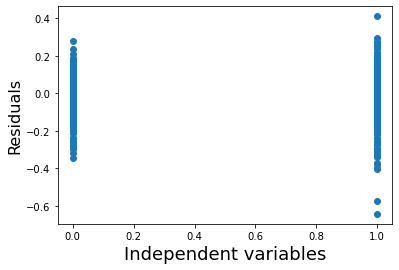

In [136]:
#PLotting the residuals to see if a pattern exists
#Checking assumption of homoscedasticity and autocorrelation
plt.figure()
plt.scatter(X_t,y_train - y_train_cnt)
fig.suptitle('Independent vars vs res', fontsize=20)              # Plot heading 
plt.xlabel('Independent variables', fontsize=18)                          # X-label
plt.ylabel('Residuals', fontsize=16)  
plt.show()

#### When we have time series data (e.g. yearly data), then the regression is likely to suffer from autocorrelation
#### because demand next year will certainly be dependent on demand this year. Hence, error terms in different observations
#### will surely be correlated with each other.

In [137]:
X_train_new.head()

,yr,holiday,workingday,windspeed,season_spring
659,1,0,1,0.078083,0
129,0,0,1,0.152073,0
672,1,0,1,0.289365,0
255,0,0,1,0.208631,0
523,1,0,0,0.281304,0


In [138]:
print(X_train_rfe1.columns)
print(lr1.summary())

Index(['const', 'yr', 'holiday', 'workingday', 'windspeed', 'season_spring'], dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     186.8
Date:                Tue, 16 Aug 2022   Prob (F-statistic):          2.96e-112
Time:                        23:39:59   Log-Likelihood:                 310.28
No. Observations:                 510   AIC:                            -608.6
Df Residuals:                     504   BIC:                            -583.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

# We can see the demand for bikes depends mainly on below variables:
# yr , holiday, workingday, windspeed, season_spring.